In [1]:
import pandas as pd

# Load CSV (full file)
df = pd.read_csv("../data/metadata.csv", low_memory=False)

print("Shape:", df.shape)
df.head()


Shape: (1056660, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [2]:
# Info about columns & data types
df.info()

# List of columns
print(df.columns.tolist())

# Missing values (top 30)
missing = df.isnull().sum().sort_values(ascending=False)
missing.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
cord_uid                  0
source_x                  0
license                   0
dtype: int64

In [3]:
# Drop irrelevant or completely empty columns
df = df.drop(columns=['mag_id'])

# Drop rows with missing title or publish_time
df = df.dropna(subset=['title', 'publish_time'])

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Drop rows where publish_time could not be converted
df = df.dropna(subset=['publish_time'])

# Create 'year' column
df['year'] = df['publish_time'].dt.year

# Fill missing abstract and journal with defaults
df['abstract'] = df['abstract'].fillna("")
df['journal'] = df['journal'].fillna("Unknown")

# Optional: create abstract word count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.split()))

print("After cleaning:", df.shape)
df[['title', 'publish_time', 'year', 'journal', 'abstract_word_count']].head()


After cleaning: (518429, 20)


,title,publish_time,year,journal,abstract_word_count
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,2001,BMC Infect Dis,262
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,2000,Respir Res,142
2,Surfactant protein-D and pulmonary host defense,2000-08-25,2000,Respir Res,219
3,Role of endothelin-1 in lung disease,2001-02-22,2001,Respir Res,68
4,Gene expression in epithelial cells in respons...,2001-05-11,2001,Respir Res,110


In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)


who_covidence_id    517433
arxiv_id            504183
pmc_json_files      203983
sha                 148068
pdf_json_files      148068
pmcid               133173
pubmed_id           105327
s2_id                77572
doi                  17075
authors              15565
dtype: int64

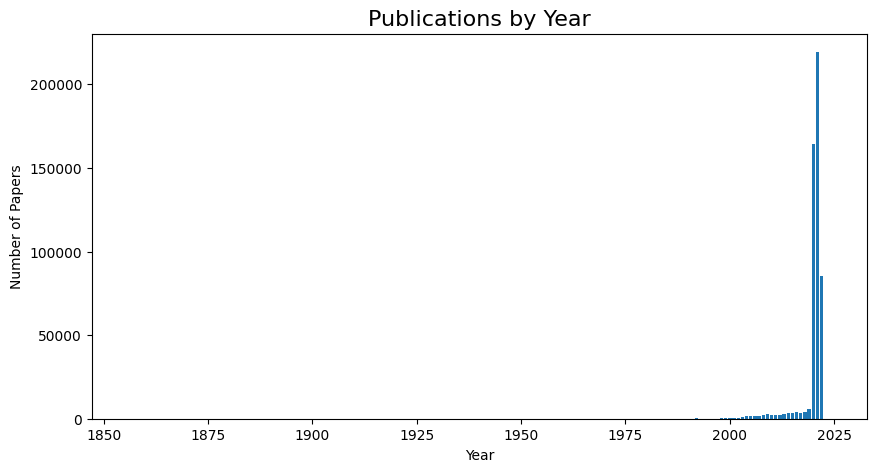

In [5]:
import matplotlib.pyplot as plt

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values)
plt.title('Publications by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.show()


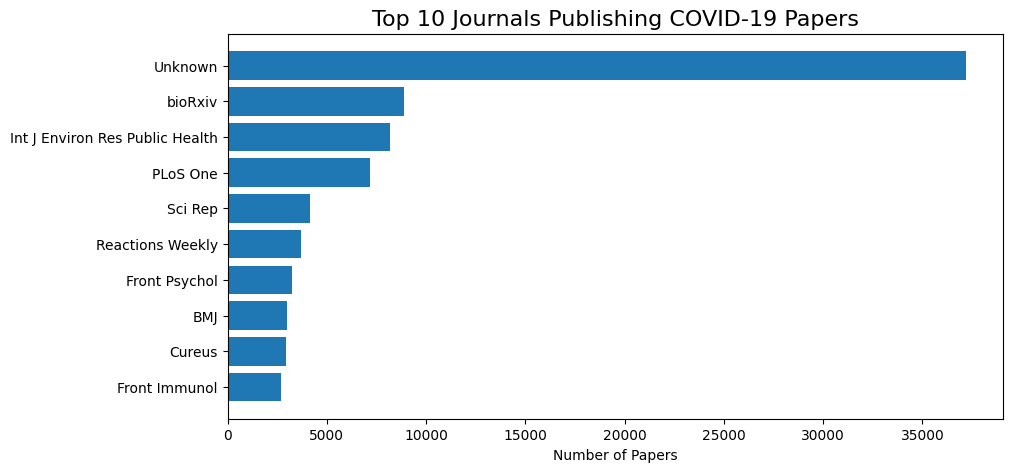

In [6]:
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.barh(top_journals.index[::-1], top_journals.values[::-1])  # reverse so biggest on top
plt.title('Top 10 Journals Publishing COVID-19 Papers', fontsize=16)
plt.xlabel('Number of Papers')
plt.show()


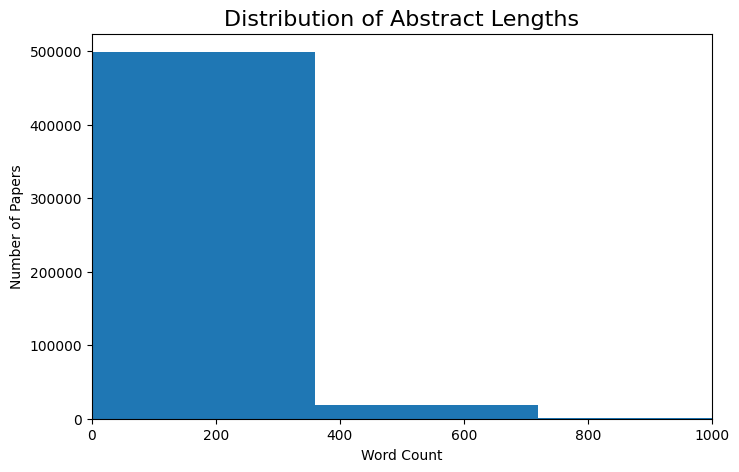

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['abstract_word_count'], bins=50)
plt.title('Distribution of Abstract Lengths', fontsize=16)
plt.xlabel('Word Count')
plt.ylabel('Number of Papers')
plt.xlim(0, 1000)  # focus on typical lengths
plt.show()


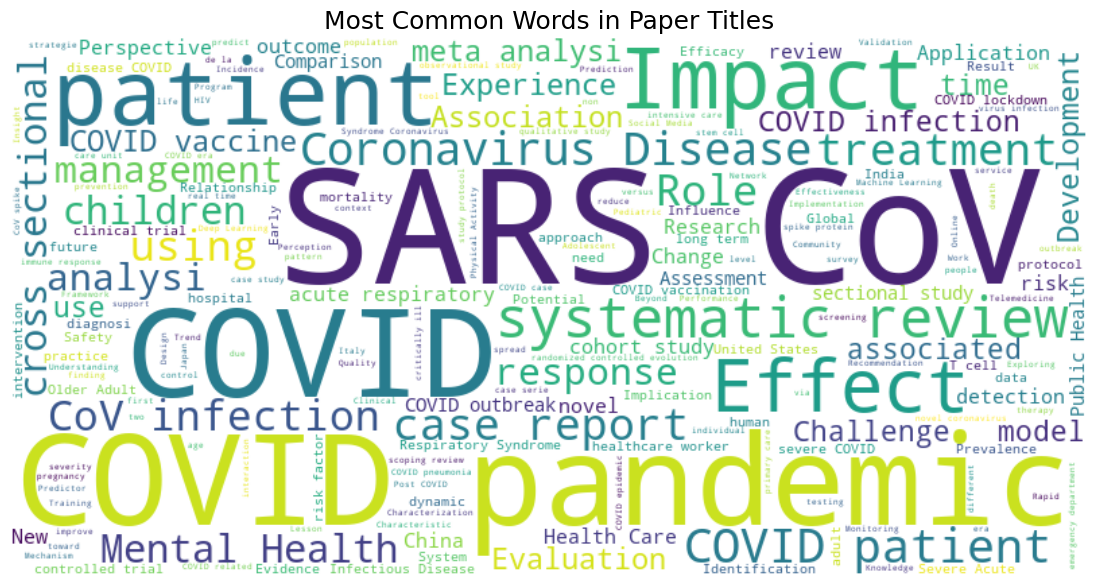

In [8]:
from wordcloud import WordCloud

text = " ".join(df['title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Paper Titles", fontsize=18)
plt.show()
